In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("/Users/fousseni/Documents/Chiara/titanic/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Issues:
1. Sex must be converted to 0/1
2. Age have a lot of non null values 
3. Embarked and Cabin also have some missing values

In [6]:
df["Age"] = df["Age"].fillna(
    df["Age"].median()
)

In [7]:
df["Embarked"] = df["Embarked"].fillna(
    df["Embarked"].mode()[0]
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
lab_enc = LabelEncoder()
df["Sex_enc"] = lab_enc.fit_transform(df["Sex"])   
lab_enc.classes_

array(['female', 'male'], dtype=object)

In [10]:
lab_enc = LabelEncoder()
df["Embarked_enc"] = lab_enc.fit_transform(df["Embarked"])  
lab_enc.classes_

array(['C', 'Q', 'S'], dtype=object)

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_enc,Embarked_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [12]:
# Test

X = df.drop(["PassengerId", "Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
Y = df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [13]:
x_train_scaled

array([[ 0.8302997 , -0.11390336, -0.47893783, ..., -0.49605375,
         0.72882288, -1.94643067],
       [ 0.8302997 , -0.11390336,  7.18406742, ...,  0.8343105 ,
        -1.37207547,  0.59409845],
       [ 0.8302997 , -0.11390336, -0.47893783, ..., -0.49605375,
         0.72882288, -1.94643067],
       ...,
       [ 0.8302997 , -0.11390336, -0.47893783, ..., -0.49605375,
         0.72882288, -1.94643067],
       [-0.37864383,  2.81297559, -0.47893783, ..., -0.42614692,
         0.72882288,  0.59409845],
       [ 0.8302997 , -0.57604214, -0.47893783, ..., -0.42579045,
        -1.37207547,  0.59409845]], shape=(712, 7))

In [28]:
model = keras.Sequential()

model.add(keras.layers.Dense(10, activation="relu", input_shape=(7,)))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

input_shape deve essere il numero di features, e quindi di colonne nel df. 
Per classificazione binaria, scegliere binary_crossentropy come loss function e sigmoid come activation function, che restituisce un numero tra 0 e 1, e quindi una probabilità.

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x_train_scaled, y_train, epochs=300, batch_size=32, validation_split=0.2)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4464 - loss: 0.7941 - val_accuracy: 0.5524 - val_loss: 0.7175
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5413 - loss: 0.7463 - val_accuracy: 0.6154 - val_loss: 0.6791
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.7054 - val_accuracy: 0.6434 - val_loss: 0.6476
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.6714 - val_accuracy: 0.6783 - val_loss: 0.6202
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 0.6417 - val_accuracy: 0.6923 - val_loss: 0.5966
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.6164 - val_accuracy: 0.7203 - val_loss: 0.5765
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6960 - loss: 0.5938 - val_accuracy: 0.7343 - val_loss: 0.5594
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.5745 - val_accuracy: 0.7622 - v

Text(0, 0.5, 'Loss')

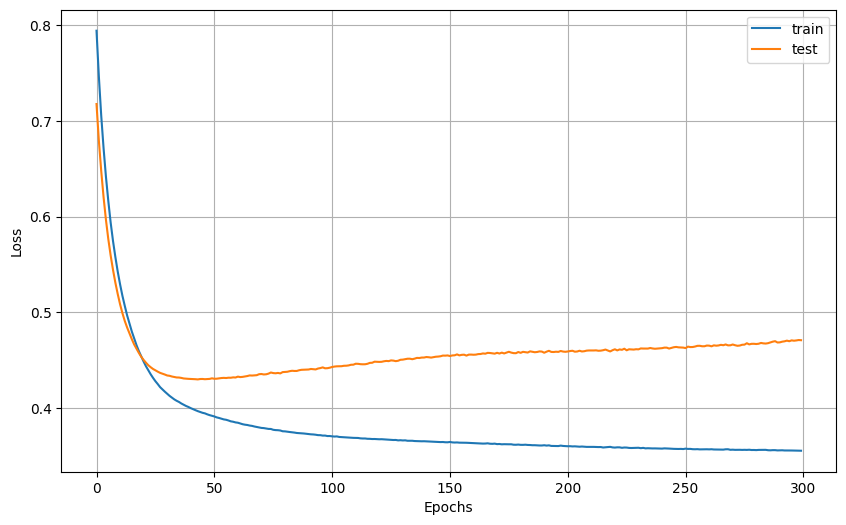

In [31]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.legend(["train", "test"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [32]:
y_pred = model.predict(x_test_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [33]:
y_pred_class = (y_pred > 0.5).astype(int)

In [34]:
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877
